In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from featureNormalize import featureNormalize
from computeCost import computeCost
from gradientDescentLinear import gradientDescentLinear
from gradientDescentMulti import gradientDescentMulti

## Homework 2 question 7

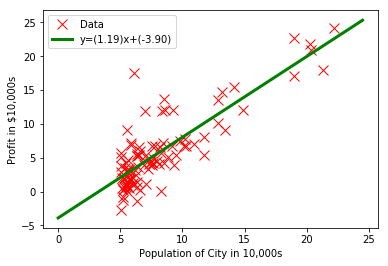

In [2]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:,0].reshape((-1,1))
y = data[:,1].reshape((-1,1))

plt.plot(X, y, 'rx', markersize=10, linewidth=3)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

bias = np.ones((X.shape[0],1))
# form a new matrix[bias xdata]
m = np.hstack((bias,X))

# normal equation w = (inv(M' * M) * M') * y
w = np.dot(np.dot(np.linalg.inv(np.dot(m.T, m)), m.T), y)

plot_x = np.arange(0, 25, 0.5)
plot_y = plot_x * w[1] + w[0]
plt.plot(plot_x, plot_y, 'g', linewidth=3)
plt.legend(['Data', 'y=(%.2f)x+(%.2f)' % (w[1], w[0])])
plt.savefig('hw2_q7.png')
plt.show()

## Homework 2 question 8

In [3]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:,0].reshape((-1,1))
y = data[:,1].reshape((-1,1))

bias = np.ones((X.shape[0],1))
# form a new matrix[bias xdata]
Xdata = np.hstack((bias,X))

theta = np.zeros((2,1))
cost = computeCost(Xdata, y, theta)
print('cost: %.4f' % cost)


cost: 32.0727


## Homework 2 question 9 & 10

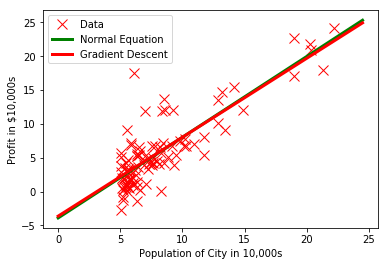

Normal equation profit at 35k: 41752.28, at 70k: 83508.46
Gradient descent profit at 35k: 40819.05, at 70k: 81641.73


In [4]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:,0].reshape((-1,1))
y = data[:,1].reshape((-1,1))

bias = np.ones((X.shape[0],1))
# form a new matrix[bias xdata]
M = np.hstack((bias,X))

# normal equation
w = np.dot(np.dot(np.linalg.inv(np.dot(M.T, M)), M.T), y)

# initialize fitting parameters to zero
theta_init = np.zeros((2,1))

# some gradient descent settings
iterations = 1500
alpha = 0.01

# run gradient descent
results = gradientDescentLinear(M, y, theta_init, alpha, iterations)
theta = results[0]

# plot data points
plt.plot(X, y, 'rx', markersize=10, linewidth=3)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

plot_x = np.arange(0, 25, 0.5)
# plot normal equation prediction
normal_y = plot_x * w[1] + w[0]
plt.plot(plot_x, normal_y, 'g', linewidth=3)

# plot gradient descent prediction
gradient_y = plot_x * theta[1] + theta[0]
plt.plot(plot_x, gradient_y, 'r', linewidth=3)

plt.legend(['Data', 'Normal Equation', 'Gradient Descent'])
plt.savefig('hw2_q9.png')
plt.show()

# question 10
p1 = 35000
p2 = 70000
normal_1 = p1 * w[1] + w[0]
normal_2 = p2 * w[1] + w[0]
print('Normal equation profit at 35k: %.2f, at 70k: %.2f' % (normal_1, normal_2))

gradient_1 = p1 * theta[1] + theta[0]
gradient_2 = p2 * theta[1] + theta[0]
print('Gradient descent profit at 35k: %.2f, at 70k: %.2f' % (gradient_1, gradient_2))

## Homework 2 question 11

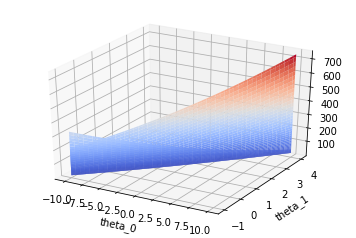

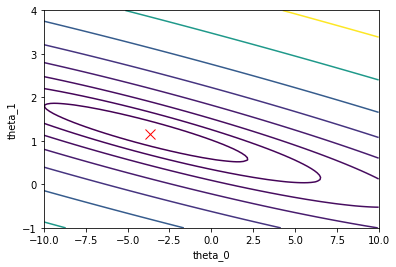

In [5]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:,0].reshape((-1,1))
y = data[:,1].reshape((-1,1))

bias = np.ones((X.shape[0],1))
# form a new matrix[bias xdata]
M = np.hstack((bias,X))

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0],theta1_vals.shape[0]))

# Fill out J_vals
for i in range(theta0_vals.shape[0]):
    for j in range(theta1_vals.shape[0]):
        t = np.array([theta0_vals[i], theta1_vals[j]]).reshape(-1,1)
        J_vals[i,j] = computeCost(M, y, t)

# because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# Surface plot
fig1 = plt.figure(1)
ax = fig1.gca(projection='3d')
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.coolwarm, linewidth=0)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.savefig('hw2_q11_1.png')
plt.show()

# contour plot
plt.figure(2)
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 1000
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)
plt.savefig('hw2_q11_2.png')
plt.show()

## Homework 2 question 12

Theta values via gradient descent:[   340412.65957447  19883657.09664929  10285258.49010348]


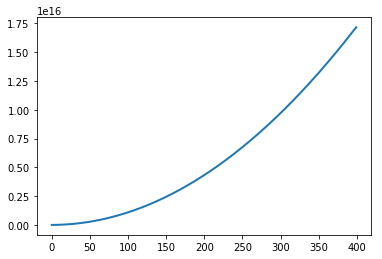

In [6]:
# load Data
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:,0:2]
y = data[:,2].reshape((-1,1))

# Scale features and set them to zero mean with std=1
# Write a function featureNormalize.m which computes
# the mean and std of X, then returns a normalized version
# of X, where we substract the mean form each feature,
# then scale so that std dev = 1

Xnorm = featureNormalize(X)[0]

# add intercept term to X
bias = np.ones((X.shape[0],1))
Xdata= np.hstack((bias,Xnorm))

# choose some alpha value
alpha = 0.01
num_iters = 400

# init Theta and Run Gradient Descent
theta = np.zeros(Xdata.shape[1])
results = gradientDescentMulti(Xdata, y, theta, alpha, num_iters)
print('Theta values via gradient descent:' + str(results[0]))

# plot J_history
plt.plot(range(0,400), results[1], markersize=10, linewidth=2)